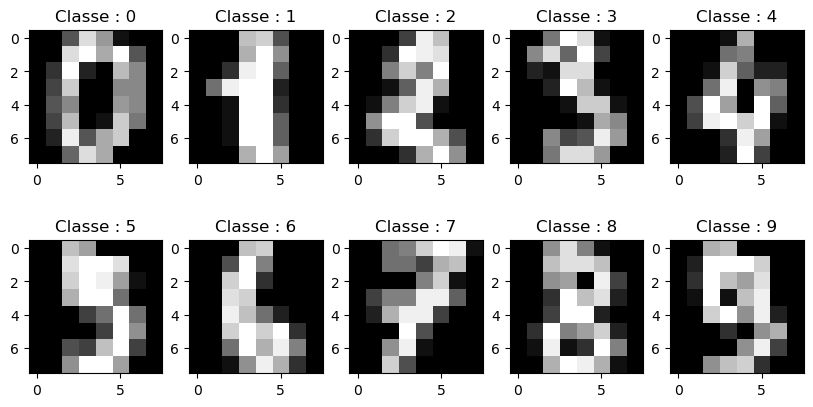

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

# Chargez le jeu de données MNIST
digits = load_digits()
X, y = digits["data"], digits["target"]

#X, y = ["data"], ["target"]

# Affichez quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):  #enumerate() allows to complete the subplot, here with 2*5 elements
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

In [2]:
y


array([0, 1, 2, ..., 8, 9, 8])

In [3]:
X.shape

(1797, 64)

Means that the data set is about 1797 object containing 64 values each (8*8) image here

In [4]:
actual_cl_len = len(np.unique(y)) #length of y, since we're on ground truth so we need to know the number of cluster we want

actual_cl_len

10

Import metrics

In [5]:
def clust_metrics(estimator, data, y = None): #function to evaluate clustering model

    from sklearn.metrics import rand_score, adjusted_rand_score
    from sklearn.metrics import ( mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score)
    from sklearn.metrics import ( homogeneity_score, completeness_score, v_measure_score)
    from sklearn.metrics import fowlkes_mallows_score
    from sklearn.metrics import silhouette_score
    from sklearn.metrics import calinski_harabasz_score
    from sklearn.metrics import davies_bouldin_score
    import pandas as pd

    estimator.fit(data)

    metrics_GT = [rand_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score, 
               adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, 
               fowlkes_mallows_score]
    
    metrics_unk = [ silhouette_score, calinski_harabasz_score, davies_bouldin_score]

    score = []
    
    if y is not None :
        for n in metrics_GT :
            met = n(y, estimator.labels_)
            score.append(round(met, 2))

        for n in metrics_unk :
            met = n(data, estimator.labels_)
            score.append(round(met, 2))
    
        return pd.DataFrame({"Clustering Metrics": score}, index=['Rand_Index', 'Adjusted_Rand_Index', 'Mutual_Information', 'Normalized_Mutual_Information', 
               'Adjusted_Mutual_Information', 'Homogeneity_score', 'Completeness_score', 'V_measure_score', 
               'Fowlkes_Mallows_score','Silhouette_score', 'Calinski_Harabasz_score', 'Davies_Bouldin_score'])
    
    else :
        for n in metrics_unk :
            met = n(data, estimator.labels_)
            score.append(round(met, 2))

        return pd.DataFrame({"Clustering Metrics": score}, index=['Silhouette_score', 'Calinski_Harabasz_score', 'Davies_Bouldin_score'])

In [11]:
model = KMeans(n_clusters = len(np.unique(y)), n_init= 10)



clust_metrics(model, X, y)

,Clustering Metrics
Rand_Index,0.94
Adjusted_Rand_Index,0.67
Mutual_Information,1.70
Normalized_Mutual_Information,0.74
Adjusted_Mutual_Information,0.74
Homogeneity_score,0.74
Completeness_score,0.75
V_measure_score,0.74
Fowlkes_Mallows_score,0.70
Silhouette_score,0.18


In [12]:
# PCA Transformation - Reduce dimension to a 2D features shape.
from sklearn.decomposition import PCA

pca = PCA(2)
X2 = pca.fit_transform(X)

model2 = KMeans(n_clusters=10, n_init=10)
y_pred2 = model.fit_predict(X2)


clust_metrics(model2, X2, y)


,Clustering Metrics
Rand_Index,0.89
Adjusted_Rand_Index,0.39
Mutual_Information,1.21
Normalized_Mutual_Information,0.53
Adjusted_Mutual_Information,0.52
Homogeneity_score,0.53
Completeness_score,0.53
V_measure_score,0.53
Fowlkes_Mallows_score,0.45
Silhouette_score,0.39


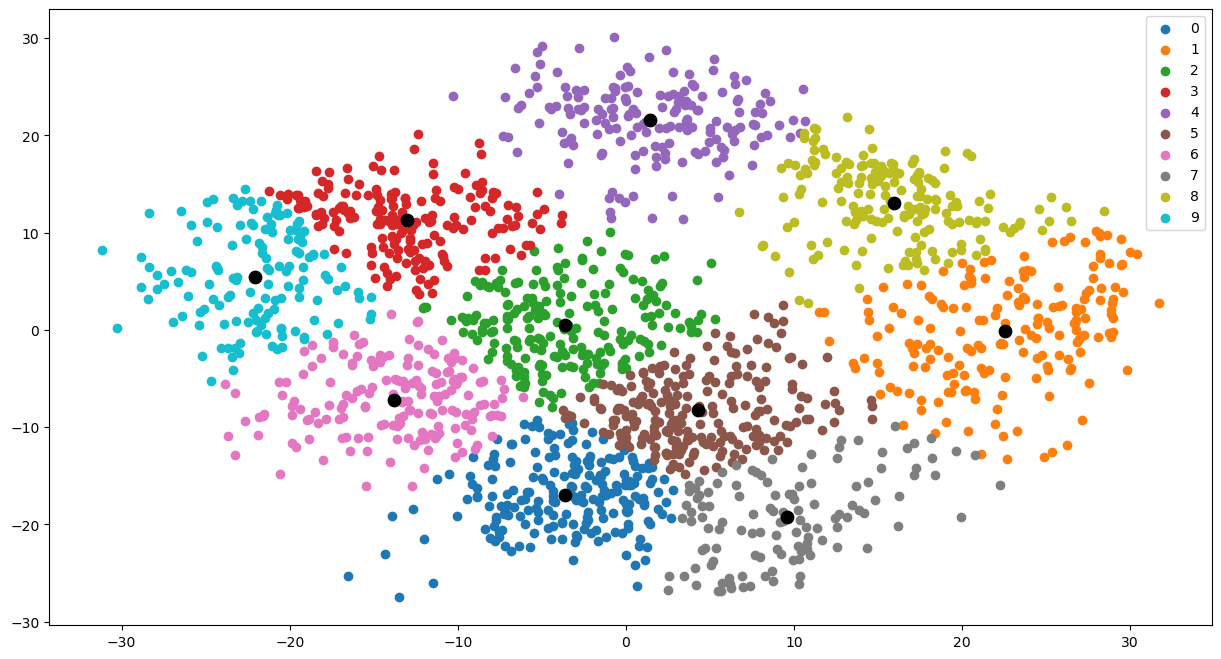

In [13]:
centroids = model.cluster_centers_
unique_labels = np.unique(y_pred2)
 
# Plot 2D result
fig = plt.figure(1, figsize=(15, 8))
for i in unique_labels:
    plt.scatter(X2[y_pred2 == i , 0] , X2[y_pred2 == i , 1] , label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s=80, color='k')
plt.legend()
plt.show()

20newsgroup Work

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score
import seaborn as sns
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt



newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

X_train = newsgroups_train.data #liste de toute les données train
X_test = newsgroups_test.data #liste de toute les données text
y_train = newsgroups_train.filenames #liste de tous les noms de texte
y_test = newsgroups_test.filenames #liste de tous les noms de texte
z = (list(newsgroups_train.target_names))
z #show newsgroup categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Explore : Show categories and their size

In [42]:
labels = newsgroups_train.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)



Cat_size = pd.DataFrame({"Topics_Label": (list(newsgroups_train.target_names)), "category_size" : category_sizes})

Cat_size

,Topics_Label,category_size
0,alt.atheism,480
1,comp.graphics,584
2,comp.os.ms-windows.misc,591
3,comp.sys.ibm.pc.hardware,590
4,comp.sys.mac.hardware,578
5,comp.windows.x,593
6,misc.forsale,585
7,rec.autos,594
8,rec.motorcycles,598
9,rec.sport.baseball,597


In [15]:
print('Train list contain ', len(y_train), 'articles') #Explore : numbers of articles
print('Test list contain ', len(y_test), 'articles') #Explore : numbers of articles


Train list contain  11314 articles
Test list contain  7532 articles


In [16]:
print(X_train[1988]) #Explore : example of an article

From: smithw@col.hp.com (Walter Smith)
Subject: Re: Playoff predictions
Organization: Colorado Springs IT Center
Lines: 41
NNTP-Posting-Host: fajita19.cs.itc.hp.com

OK, I'll join in the fun and give my playoff predictions: 

1st round: 
----------

PITT vs NYI:  PITT in 4.  
WASH vs NJD:  WASH in 6. 

BOS  vs BUF:  BOS  in 5. 
QUE  vs MON:  MON  in 7. 

CHI  vs STL:  CHI in 4. 
DET  vs TOR:  DET in 6. 

VAN  vs WIN:  WIN in 6. 
CAL  vs  LA:  CAL in 5. 

2nd round: 
----------

PITT vs WASH: PITT in 4. 
BOS  vs MON:  BOS  in 6. 

CHI  vs DET:  CHI  in 7. 
WIN  vs CAL:  CAL  in 5. 

3rd round: 
----------

PITT vs BOS:  PITT in 5. 
CHI  vs CAL:  CHI  in 5. 

Finals:
------

PITT vs CHI: PITT in 5. 


Walter




2) Vectorize text to allow clustering by Kmeans which requiere numerical values

First TfidVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


TfidV =  TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
TfidV_train = TfidV.fit_transform(X_train)
TfidV_test = TfidV.fit_transform(X_test)
print(TfidV_train.shape)
print(TfidV_test.shape)

df_TfidV_train = pd.DataFrame(TfidV_train.toarray().transpose())

df_TfidV_train



(11314, 56121)
(7532, 41432)


,0,1,2,3,4,5,6,7,8,9,...,11304,11305,11306,11307,11308,11309,11310,11311,11312,11313
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Second vectorization method = CountVectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

CountV =  CountVectorizer(max_df=0.5, min_df=2, stop_words='english')
CountV_train = CountV.fit_transform(X_train)
CountV_test = CountV.fit_transform(X_test)
print(CountV_train.shape)
print(CountV_test.shape)

(11314, 56121)
(7532, 41432)


In [19]:
def clust_metrics_alt(estimator, data, y = None): #function to evaluate clustering model

    from sklearn.metrics import rand_score, adjusted_rand_score
    from sklearn.metrics import ( mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score)
    from sklearn.metrics import ( homogeneity_score, completeness_score, v_measure_score)
    from sklearn.metrics import fowlkes_mallows_score
    from sklearn.metrics import silhouette_score
    from sklearn.metrics import calinski_harabasz_score
    from sklearn.metrics import davies_bouldin_score
    import pandas as pd

    estimator.fit(data)

    metrics_GT = [rand_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score, 
               adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, 
               fowlkes_mallows_score]
    
    metrics_unk = [ silhouette_score]

    score = []
    
    if y is not None :
        for n in metrics_GT :
            met = n(y, estimator.labels_)
            score.append(round(met, 2))

        for n in metrics_unk :
            met = n(data, estimator.labels_)
            score.append(round(met, 2))
    
        return pd.DataFrame({"Clustering Metrics": score}, index=['Rand_Index', 'Adjusted_Rand_Index', 'Mutual_Information', 'Normalized_Mutual_Information', 
               'Adjusted_Mutual_Information', 'Homogeneity_score', 'Completeness_score', 'V_measure_score', 
               'Fowlkes_Mallows_score','Silhouette_score'])
    
    else :
        for n in metrics_unk :
            met = n(data, estimator.labels_)
            score.append(round(met, 2))

        return pd.DataFrame({"Clustering Metrics": score}, index=['Silhouette_score'])

3) Training Kmeans clustering model, and evaluate Clustering

In [44]:
from sklearn.cluster import KMeans

k = len(z)

model_Tfid = KMeans(k, max_iter=100)

model_Tfid.fit(TfidV_train)

Kmeans_score_Tfid = clust_metrics_alt(model_Tfid, TfidV_test, y_test)

cluster_ids_Tfid, cluster_sizes_Tfid = np.unique(model_Tfid.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of elements assigned to each cluster: [   6   41   32  717    2    2    1    1    1 6711    1    3    1    1
    1    1    1    3    4    2]

True number of documents in each category according to the class labels: [480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


In [43]:

model_CountV = KMeans(k,max_iter=100)
model_CountV.fit(CountV_train)
Kmeans_score_CountV = clust_metrics_alt(model_CountV, CountV_test, y_test)

cluster_ids_CountV, cluster_sizes_CountV = np.unique(model_CountV.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of elements assigned to each cluster: [   6   41   32  717    2    2    1    1    1 6711    1    3    1    1
    1    1    1    3    4    2]

True number of documents in each category according to the class labels: [480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


In [47]:
Cluster_size = pd.DataFrame({"True_category_size" : sorted(category_sizes), "model_Tfid_Cluster size" : sorted(cluster_sizes_Tfid), "model_CountV_Cluster size" : sorted(cluster_sizes_CountV)})

Cluster_size

,True_category_size,model_Tfid_Cluster size,model_CountV_Cluster size
0,377,61,1
1,465,74,1
2,480,87,1
3,546,90,1
4,564,98,1
5,578,141,1
6,584,143,1
7,585,192,1
8,590,234,1
9,591,251,1


Création d'un tableau Contenant les scores pour chaque méthode de vectorization

In [24]:
Kmeans_score = Kmeans_score_Tfid.rename(columns = {'Clustering Metrics':'Tfid Vectorizer'})


pdToList = list(Kmeans_score_CountV['Clustering Metrics'])


Kmeans_score['CounterVect'] = pdToList

Kmeans_score

,Tfid Vectorizer,CounterVect
Rand_Index,0.88,0.07
Adjusted_Rand_Index,0.00,0.00
Mutual_Information,2.53,0.20
Normalized_Mutual_Information,0.44,0.04
Adjusted_Mutual_Information,-0.00,-0.00
Homogeneity_score,0.28,0.02
Completeness_score,1.00,1.00
V_measure_score,0.44,0.04
Fowlkes_Mallows_score,0.00,0.00
Silhouette_score,0.01,0.54


Evaluation metrics still very poor. But we can observe a slight increase for some score with the Tfid Vectorization method.
Note that 2 metrics 'Calinski_Harabasz_score' and 'Davies_Bouldin_score' return error on calculation and were remove for the evaluation function.

Next I'm gonna to clean the text from repeated information such as headers and footers informations.

In [25]:
order_centroids = model_Tfid.cluster_centers_.argsort()[:, ::-1]
terms = TfidV.get_feature_names_out()
for i in range (k):
    print("Cluster %d:" %(i+1))
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 1:
 stratus
 sw
 cdt
 com
 rocket
 vos
 tavares
 investors
 computer
 packet
Cluster 2:
 god
 jesus
 sin
 bible
 christian
 christ
 believe
 church
 christians
 faith
Cluster 3:
 space
 nasa
 henry
 digex
 access
 gov
 hst
 shuttle
 mission
 sky
Cluster 4:
 sun
 com
 microsystems
 east
 central
 eng
 green
 ed
 egreen
 clesun
Cluster 5:
 cmu
 andrew
 carnegie
 mellon
 pittsburgh
 pa
 infante
 v6
 v8
 eliot
Cluster 6:
 game
 games
 team
 baseball
 buffalo
 espn
 hockey
 year
 players
 don
Cluster 7:
 clipper
 key
 com
 chip
 sternlight
 encryption
 government
 netcom
 david
 keys
Cluster 8:
 file
 image
 window
 files
 gif
 format
 graphics
 display
 program
 images
Cluster 9:
 drive
 ide
 drives
 stafford
 hard
 shaft
 winona
 floppy
 disk
 wheelies
Cluster 10:
 com
 hp
 article
 netcom
 sgi
 bike
 posting
 ca
 like
 host
Cluster 11:
 israel
 muslims
 jews
 muslim
 armenian
 jewish
 arab
 armenians
 jake
 war
Cluster 12:
 windows
 dos
 microsoft
 os
 ms
 mouse
 com
 run
 nt
 fi

In [26]:
order_centroids = model_CountV.cluster_centers_.argsort()[:, ::-1]
terms = CountV.get_feature_names_out()
for i in range (k):
    print("Cluster %d:" %(i+1))
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 1:
 venus
 health
 1993
 number
 disease
 cancer
 11
 cesarean
 medical
 new
Cluster 2:
 istanbul
 file
 server
 use
 ve
 university
 com
 new
 xfree86
 ed
Cluster 3:
 dos
 windows
 microsoft
 tcp
 ms
 mouse
 amiga
 software
 pc
 graphics
Cluster 4:
 people
 god
 don
 like
 just
 think
 know
 say
 said
 way
Cluster 5:
 00
 20
 appears
 40
 50
 art
 80
 10
 wolverine
 60
Cluster 6:
 jpeg
 image
 gif
 file
 color
 images
 format
 quality
 version
 files
Cluster 7:
 jehovah
 lord
 god
 christ
 father
 unto
 son
 ps
 jesus
 said
Cluster 8:
 graphics
 pub
 mail
 ray
 128
 send
 3d
 ftp
 com
 server
Cluster 9:
 mb
 m4
 ms
 ma
 mz
 mm
 m1
 mo
 mc
 mu
Cluster 10:
 homosexuality
 homosexual
 mac
 paul
 boswell
 files
 god
 comp
 disk
 arsenokoitai
Cluster 11:
 25
 pit
 10
 det
 bos
 vitamin
 image
 tor
 40
 chi
Cluster 12:
 image
 graphics
 data
 available
 ftp
 software
 processing
 pub
 images
 analysis
Cluster 13:
 com
 article
 university
 posting
 host
 nntp
 don
 like
 just
 know


In [30]:
TfidV_train

<11314x56121 sparse matrix of type '<class 'numpy.float64'>'
	with 1180455 stored elements in Compressed Sparse Row format>

Tentative de projection des Clusters obtenus

In [28]:
# PCA Transformation - Reduce dimension to a 2D features shape.
from sklearn.decomposition import PCA

pca = PCA(2)
X2_TfidV = pca.fit_transform(df_TfidV_train)


y_pred_Tfid = model_Tfid.fit_predict(X2_TfidV)



/Users/fabien/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


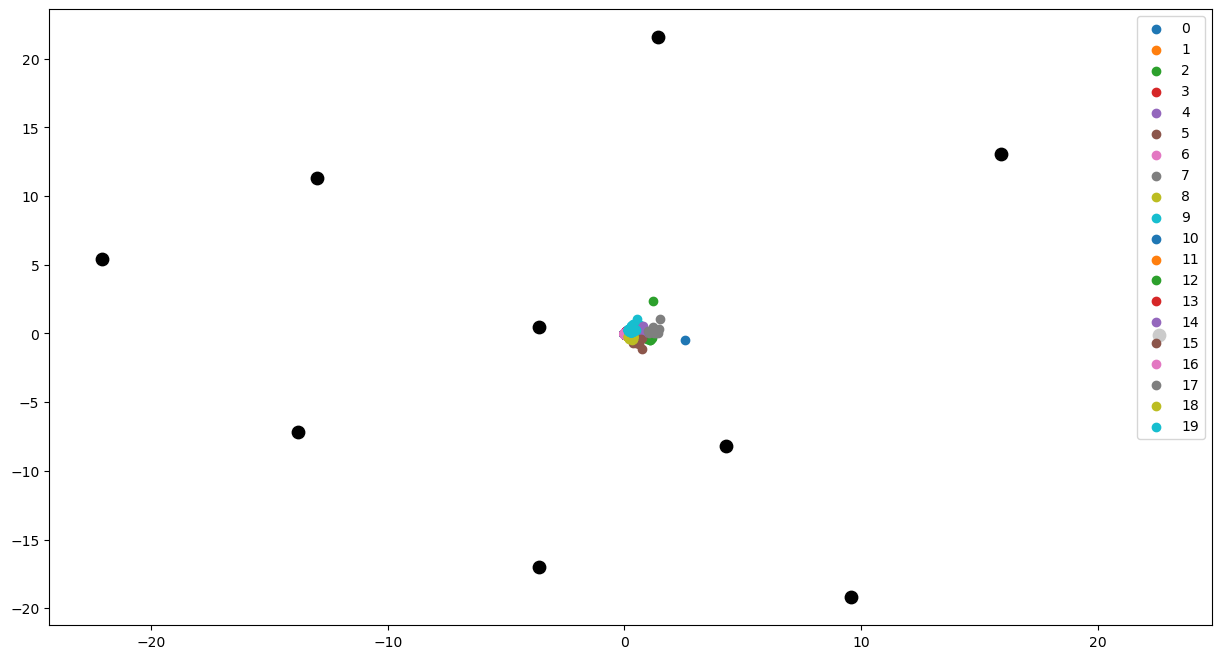

In [29]:
centroids = model.cluster_centers_
unique_labels = np.unique(y_pred_Tfid)
 
# Plot 2D result
fig = plt.figure(1, figsize=(15, 8))
for i in unique_labels:
    plt.scatter(X2_TfidV[y_pred_Tfid == i , 0] , X2_TfidV[y_pred_Tfid == i , 1] , label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s=80, color='k')
plt.legend()
plt.show()

On voit ici que l'on ne peut générer de projection des cluster.

3) Test other clustering method, specified to text clustering : "LDA"

In [32]:
from sklearn.decomposition import LatentDirichletAllocation

model_LDA = LatentDirichletAllocation(n_components=20)

model_LDA.fit(TfidV_train)



LatentDirichletAllocation(n_components=20)

In [33]:
order_centroids = model_LDA.cluster_centers_.argsort()[:, ::-1]
terms = TfidV.get_feature_names_out()
for i in range (k):
    print("Cluster %d:" %(i+1))
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

AttributeError: 'LatentDirichletAllocation' object has no attribute 'cluster_centers_'

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


y_pred = model_LDA.predict(TfidV_test)

y_true = TfidV_test.target
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_true, y_pred, target_names= z)
print(report)

AttributeError: 'LatentDirichletAllocation' object has no attribute 'predict'